# Inferential Statistics

## Sampling Distribution

A Sampling Distribution is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population.

In [169]:
import pandas as pd
import numpy as np
import matplotlib

In [170]:
df = pd.DataFrame(np.random.randint(1000,100000,size=(100000, 1)), columns=list('A'))

In [171]:
df.head()

A
0  19072
1  15363
2  97990
3  79486
4   3096

In [172]:
df.describe()

A
count  100000.000000
mean    50506.511710
std     28659.052682
min      1001.000000
25%     25577.500000
50%     50620.500000
75%     75335.000000
max     99999.000000

The population mean is ~50K

### Distribution of the population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca3f860>]],
      dtype=object)

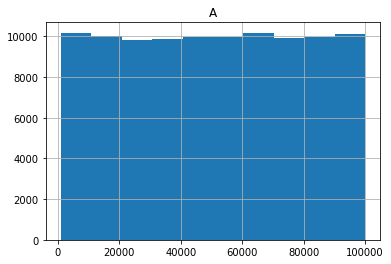

In [173]:
df.hist()

### Let's create a sampling distribution

In [174]:
samp_list = []
for i in range(0,300):
    df_sample = df.sample(50)
    samp_list.append(df_sample['A'].mean())

In [175]:
print(samp_df)

     samp_mean
0     53306.42
1     54674.96
2     49800.50
3     52438.10
4     51586.06
5     51082.22
6     54262.40
7     56198.94
8     52786.26
9     48301.76
10    45159.06
11    49543.24
12    55185.52
13    44657.60
14    54766.16
15    59844.78
16    49360.40
17    53748.56
18    55135.96
19    44172.92
20    45312.26
21    43928.94
22    47865.92
23    54364.48
24    52431.80
25    46810.84
26    61008.16
27    45400.70
28    50591.76
29    49347.54
..         ...
270   50501.54
271   54126.86
272   56360.70
273   48301.74
274   45604.98
275   50091.00
276   46215.06
277   57926.00
278   48122.18
279   52536.44
280   49783.82
281   45927.64
282   48117.80
283   53019.26
284   43468.24
285   47736.68
286   52885.30
287   53121.98
288   48591.34
289   49524.60
290   52710.12
291   49873.16
292   52111.36
293   54519.92
294   44967.66
295   46791.22
296   44476.00
297   51441.62
298   44712.84
299   44283.68

[300 rows x 1 columns]


In [176]:
samp_df = pd.DataFrame({'samp_mean':samp_list})

In [177]:
samp_df

samp_mean
0     46543.96
1     50524.36
2     57041.46
3     48578.28
4     53043.14
5     48248.48
6     47547.76
7     45869.64
8     58781.26
9     50286.72
10    53799.54
11    52445.72
12    49856.48
13    51059.90
14    53701.30
15    48391.98
16    62731.20
17    51415.68
18    43140.20
19    52176.28
20    52228.10
21    55534.46
22    54774.98
23    52054.60
24    50123.38
25    40759.88
26    52927.56
27    50070.82
28    47923.58
29    54432.20
..         ...
270   58978.10
271   53067.96
272   49813.60
273   57788.34
274   50343.62
275   57601.70
276   55561.32
277   47455.82
278   45028.06
279   50119.24
280   48293.70
281   45390.88
282   53462.12
283   46001.88
284   48722.34
285   54644.82
286   47669.84
287   45588.38
288   43188.62
289   51820.78
290   53287.34
291   53540.58
292   45319.56
293   48638.12
294   50443.22
295   44735.90
296   49459.88
297   48907.32
298   57388.00
299   51205.22

[300 rows x 1 columns]

### Let's visualise this sampling distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cb26b38>]],
      dtype=object)

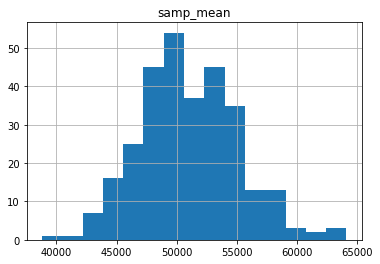

In [178]:
samp_df.hist(bins = 15)

In [179]:
import seaborn as sns

sns.distplot(samp_df, bins = 15)

#### Let's get some univariate statistics on the samples

In [180]:
samp_df.describe()

samp_mean
count    300.000000
mean   51030.938133
std     4091.445431
min    38799.200000
25%    48138.550000
50%    50719.350000
75%    53704.395000
max    64094.440000

The mean of the sampling distribution is almost equal to the mean of the population! 

Also, this average also coincides with the middle of the bell shaped curve 

Sampling Distribution helps to estimate the population statistic.

## Let's look at sampling on skewed data

In [181]:
from scipy.stats import skewnorm
a=10
skew_array = skewnorm.rvs(a, size=100000)

In [182]:
skew_df = pd.DataFrame({'samp_mean':skew_array})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cb26ef0>]],
      dtype=object)

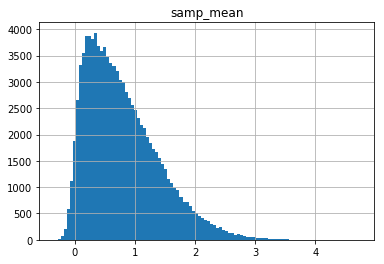

In [183]:
skew_df.hist(bins = 100)

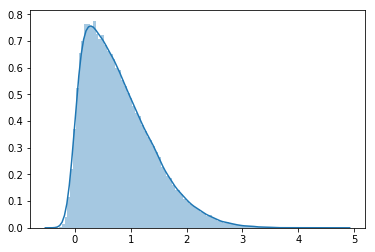

In [184]:
sns.distplot(skew_df, bins = 100)

In [186]:
skew_df.describe()

samp_mean
count  100000.000000
mean        0.793124
std         0.604171
min        -0.337678
25%         0.321443
50%         0.676217
75%         1.150800
max         4.728001

In [198]:
population_mean = skew_df['samp_mean'].mean()

Mean is approximately 0.79

#### Now let's generate the sampling distribution

In [187]:
samp_skew_list = []
for i in range(0,300):
    df_sample = skew_df.sample(50)
    samp_skew_list.append(df_sample['samp_mean'].mean())
    
samp_skew_df = pd.DataFrame({'samp_mean':samp_skew_list})

In [188]:
sns.distplot(samp_skew_df, bins = 15)

In [189]:
samp_skew_df.describe()

samp_mean
count  300.000000
mean     0.795309
std      0.085468
min      0.500130
25%      0.731454
50%      0.794377
75%      0.859587
max      1.066067

mean of sampling distribution is ~ 0.80 and the distribution is a bell-shaped normal distribution

#### let's increase the sample size

In [190]:
samp_skew_list = []
for i in range(0,300):
    df_sample = skew_df.sample(1000)
    samp_skew_list.append(df_sample['samp_mean'].mean())
    
samp_skew_df = pd.DataFrame({'samp_mean':samp_skew_list})

In [191]:
sns.distplot(samp_skew_df, bins = 20)

#### The shape of the normal curve becomes more prominent and we can tell with more accurately about the population mean using the sample mean

# Confidence intervals

Let's take our huge population and create the sampleing distribution first

In [192]:
samp_skew_list = []
for i in range(0,300):
    df_sample = skew_df.sample(50)
    samp_skew_list.append(df_sample['samp_mean'].mean())
    
samp_skew_df = pd.DataFrame({'samp_mean':samp_skew_list})

In [193]:
samp_skew_df.describe()

samp_mean
count  300.000000
mean     0.800354
std      0.079489
min      0.561914
25%      0.745010
50%      0.794788
75%      0.856280
max      1.008317

Let's calculate 95% confidence interval on the sampling mean

#### 95% confidence interval

In [194]:
sample_mean = 0.800354
sample_sd = 0.079489
sample_size = 50
z = 1.96

In [195]:
CI_lower = sample_mean - (z*sample_sd/np.sqrt(sample_size))

CI_upper = sample_mean + (z*sample_sd/np.sqrt(sample_size))

print(CI_lower)

print(CI_upper)

0.778320773315543
0.8223872266844571


In [199]:
import matplotlib.pyplot as plt

plt.hist(samp_skew_df['samp_mean'], bins = 15)
plt.axvline(sample_mean, color = 'green')
plt.axvline(CI_lower, color = 'red')
plt.axvline(CI_upper, color = 'red')
plt.axvline(population_mean, color = 'black')
plt.show()